## EE-361M Introduction to Data Mining
## Assignment #5
## Due: Thursday, Apr 14, 2016 by 2pm; Total points: 60


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 (1+1+5+3+3+2=15pts) - Logistic Regression

In this question we will be predicting whether someone will have an affair! Yes - there is data on this. See below on how to import the data.
1. Convert naffairs to a binary variable hadAffair which is 1 if had an affair and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is hadAffair and X matrix includes all the other variables except naffairs.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the confusion matrix on the test data. Also report the accuracy for the "no affairs" class, the affairs class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://blog.dato.com/how-to-evaluate-machine-learning-models-part-2a-classification-metrics).
4. Repeat question 1, part 3 except use l2 penalty with Cs of [.001, .01,0.1, 1]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 1, part 4 except use l1 (i.e. Lasso) instead of l2 as the penalty type.
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

In [8]:
#pip install pydataset

In [9]:
from pydataset import data
df = data('affairs')

# ANSWER
## 1

In [10]:
df['hadAffair'] = df.naffairs > 0
del df['naffairs']

## 2

In [11]:
from sklearn.cross_validation import train_test_split
y = df.hadAffair
del df['hadAffair']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

## 3

[[136  10]
 [ 43  10]]
No Affair Acc: 0.931506849315
Affair Acc: 0.188679245283
Avg Acc: 0.560093047299


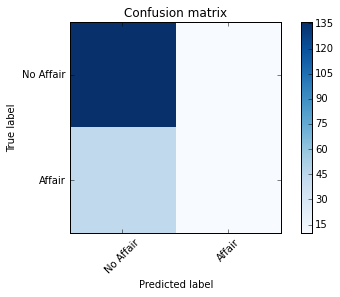

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
%matplotlib inline

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No Affair', 'Affair'], rotation=45)
    plt.yticks(tick_marks, ['No Affair', 'Affair'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def accuracies(cm):
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    print("No Affair Acc: {0}".format(no_acc))
    print("Affair Acc: {0}".format(yes_acc))
    print("Avg Acc: {0}".format((no_acc + yes_acc)/2))
    

def run_model(model):
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm)
    accuracies(cm)
    
clf = LogisticRegression(penalty='l2', C=1000)
run_model(clf)

## 4

[[137   9]
 [ 43  10]]
No Affair Acc: 0.938356164384
Affair Acc: 0.188679245283
Avg Acc: 0.563517704833


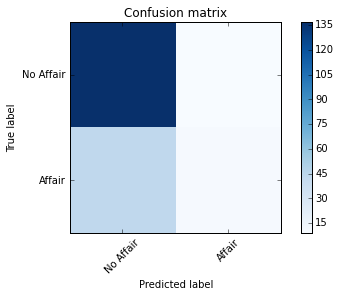

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def cm_loss(estimator, X, y):
    predictions = estimator.predict(X)
    cm = confusion_matrix(y, predictions)
    totals = np.sum(cm, 1)
    no_acc = cm[0, 0] / totals[0]
    yes_acc = cm[1, 1] / totals[1]
    return (no_acc + yes_acc)/2


lr = LogisticRegression(penalty='l2')
parameters = {'C':[.001, .01, 1]}
clf = GridSearchCV(lr, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)

## 5

[[138   8]
 [ 43  10]]
No Affair Acc: 0.945205479452
Affair Acc: 0.188679245283
Avg Acc: 0.566942362368


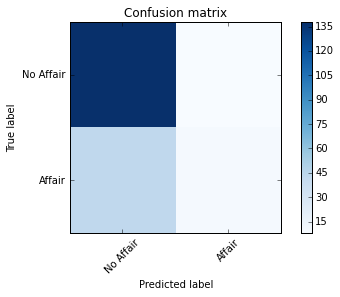

In [14]:
lr = LogisticRegression(penalty='l1')
parameters = {'C':[.001, .01, 1]}
clf = GridSearchCV(lr, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)

## 6 

Part 5 produces the best average accuracy. This is probably because l1 regularization works a bit better in this case than l2. The main differences between all the models is the type of regularization and how strong the regularization is.

# Question 2 (2+3+2+3=10pts) - Support Vector Classifier

This question will continue to use the data from question 1 - including the training and test split data.
1. Fit a support vector classifier using the standard options on [sklearn's SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). Report the confusion matrix on the test data. Also report the accuracy for the no affairs class, the affairs class, and the average per-class accuracy (same as question 1).
2. Repeat question 2, part 1 except use grid search to select the best value of C within this set: [0.001, 0.01, 0.1, 1,5,10,100] and try both a radial and polynomial kernel (thus trying 14 combinations). Choose the combination that maximizes the average per-class accuracy. Use 5 folds. Report the best model, the confusion matrix, the accuracy for the no affairs class, the affairs class, and the average per-class accuracy.
3. Briefly discuss the effect of different  C,  kernel combinations.
4. Discuss your results from question 2, part 1 and question 2, part 2 and mention how they differ from Question 1's results.

# ANSWERS
## 1

[[146   0]
 [ 53   0]]
No Affair Acc: 1.0
Affair Acc: 0.0
Avg Acc: 0.5


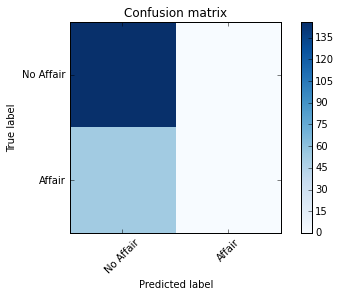

In [15]:
from sklearn.svm import SVC
clf = SVC()
run_model(clf)

## 2

[[119  27]
 [ 37  16]]
No Affair Acc: 0.815068493151
Affair Acc: 0.301886792453
Avg Acc: 0.558477642802
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


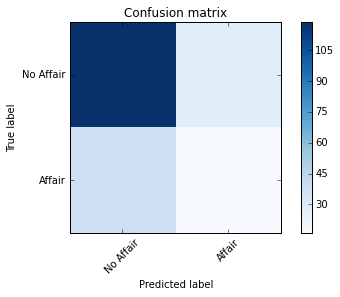

In [16]:
model = SVC()
parameters = {'C':[0.001, 0.01, 0.1, 1,5,10,100], 'kernel': ['rbf', 'poly']}
clf = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)
print(clf.best_estimator_)

## 3

The C parameter tells the SVC how much you want to avoid misclassifying each training example. Here is a good [explanation](https://www.quora.com/What-are-Kernels-in-Machine-Learning-and-SVM) of kernels.


## 4

Part 1 is being affected by the class imbalance and always predicting no affairs. The hyperparameter selection in part 2 helps guide the model to select a more balanced accuracy. However, it is important to note that we are not actually changing the underlying model which is still trying to maximize accuracy. The SCV gets a similar average as question 1, but fairs better on predicting affairs and worse on no affairs.

# Question 3 (2+1+3+1+3=10pts) - Regression Trees

This question is very similar to homework 4 question 1. Except now we will be using regression trees and not classification trees, and you will be addressing a regression problem (i.e., the independent variable "price" will not be binarized).

For this question, we will be using the housing dataset (see code below). 

1. Convert driveway, recroom, fullbase, gashw, airco, and prefarea to numeric dummy variables (1 for yes, zero for no)
2. Split the data into training and testing with a random seed of 42 and keeping 1/3rd of the data for testing
2. Fit a [decision tree regressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) to predict price using all the data (your dummy variables plus bedrooms and bathrooms).
5. Report the root MSE on the test data.
6. How does the tree decide on a splitting point?

In [17]:
df = data('Housing')

# ANSWERS
## 1

See homework 4 question 1

In [18]:
import pandas as pd
df_dummies = pd.get_dummies(df)

## 2 & 3

In [19]:
from sklearn.tree import DecisionTreeRegressor
features = ['bedrooms', 'bathrms', 'fullbase_yes', 'driveway_yes', 
            'recroom_yes', 'gashw_yes', 'airco_yes', 'prefarea_yes']
X = df_dummies[features].values
y = df_dummies['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## 4

In [20]:
predictions = clf.predict(X_test)
print ("Test RMSE: {}".format(np.sqrt(np.mean((predictions - y_test)**2))))

Test RMSE: 21516.8146802


## 5

The tree split is choosen in a top-down, greedy approach that selects the split point that leads to the greatest reduction is the sum of squared errors.

# Question 4 (2+5+3=10pts) - Support Vector Regression

This question will continue to use the data from question 3 - including the training and test split data.

1. Fit a support vector regression using the standard options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Report the root MSE.
2. Repeat question 4, part 1 except use grid search to select the best value of C within this set: [0.001, 0.01, 0.1, 1,5,10,100] and try both a radial and polynomial kernel (thus trying 14 combinations). Choose the combination that minimizes MSE. Use 5 folds. Report the best model and the test root MSE.
4. Discuss your results from question 4, part 1 and question 4, part 2 and how they differ from Question 3 results.

# ANSWERS
## 1

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
clf = SVR()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Test MSE: {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

Test MSE: 29005.4256903


## 2

In [22]:
model = SVR()
parameters = {'C':[0.001, 0.01, 0.1, 1,5,10,100], 'kernel': ['rbf', 'poly']}
clf = GridSearchCV(model, parameters, scoring='mean_squared_error', cv=5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [23]:
predictions = clf.predict(X_test)
print("Test MSE: {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

Test MSE: 22200.7194052


## 3

The support vector regressor actually performs worse than the regression tree. This could be due to the SVR overfitting to the training data.

# Question 5 (3+2+2+2+2+2+2=15pts) - Random Forest

This question will also continue to use the data from Question 1.
1. Fit a random forest model grid searching over the following values: {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}. Choose the combination that maximizes the average per-class accuracy. Use 5 folds. Report the best model, the confusion matrix, the accuracy for the no affairs class, the affairs class, and the average per-class accuracy.
2. What do the n_estimators and max_features parameters do?
3. Report the features in order of importance based on the model used in question 5, part 1
4. Repeat question 5, part 1 using an AdaBoostClassifier and grid search over the following values: {'n_estimators':[50, 500, 5000], 'learning_rate': [.001, .01, .1]}
5. What does the learning_rate parameter do?
6. Report the features in order of importance based on the model used in question 5, part 4
7. Compare the results in question 5, part 1 and question 5, part 4 and questions 2 and 3

# ANSWERS
## 1

[[120  26]
 [ 40  13]]
No Affair Acc: 0.821917808219
Affair Acc: 0.245283018868
Avg Acc: 0.533600413544
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


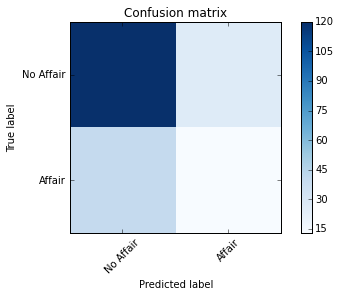

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

df = data('affairs')
df['hadAffair'] = df.naffairs > 0
del df['naffairs']
y = df.hadAffair
del df['hadAffair']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

model = RandomForestClassifier()
parameters = {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
clf = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)
print(clf.best_estimator_)

## 2

n_estimators tells the random forest how many trees to use. max_features specifices the maximum number of features each tree gets to use.

## 3

In [25]:
fi = zip(X_train.columns, clf.best_estimator_.feature_importances_)
fi_sort = sorted(fi, key=lambda (x,y): y, reverse=True)
fi_sort

[('kids', 0.098733754170169774),
 ('unhap', 0.081832558828734109),
 ('vryhap', 0.075465290858482387),
 ('smerel', 0.064719395165876839),
 ('antirel', 0.062153976633079373),
 ('yrsmarr4', 0.061099646263784148),
 ('slghtrel', 0.058803511346960338),
 ('notrel', 0.058649592925115991),
 ('yrsmarr6', 0.057350278322462478),
 ('hapavg', 0.055370301498720777),
 ('avgmarr', 0.055187921090979503),
 ('yrsmarr5', 0.053178399523734522),
 ('yrsmarr3', 0.04816221795710502),
 ('vryunhap', 0.046750467308264321),
 ('yrsmarr2', 0.044509040296992305),
 ('vryrel', 0.040645575532086989),
 ('yrsmarr1', 0.037388072277450828)]

## 4

[[135  11]
 [ 43  10]]
No Affair Acc: 0.924657534247
Affair Acc: 0.188679245283
Avg Acc: 0.556668389765
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=5000, random_state=None)


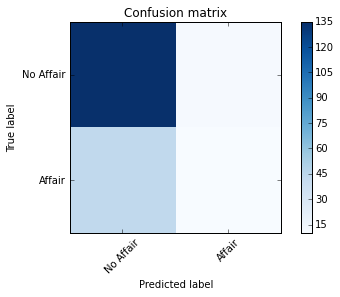

In [26]:
model = AdaBoostClassifier()
parameters = {'n_estimators':[50, 500, 5000], 'learning_rate': [.001, .01, .1]}
clf = GridSearchCV(model, parameters, scoring=cm_loss, cv=5)
clf.fit(X_train, y_train)
run_model(clf.best_estimator_)
print(clf.best_estimator_)

## 5

Learning rate shrinks the contribution of each classifier, which makes the model learn slower. Typically with lower learning rates you use more estimators.

## 6

In [27]:
fi = zip(X_train.columns, clf.best_estimator_.feature_importances_)
fi_sort = sorted(fi, key=lambda (x,y): y, reverse=True)
fi_sort

[('yrsmarr2', 0.125),
 ('vryrel', 0.1008),
 ('smerel', 0.0998),
 ('unhap', 0.099000000000000005),
 ('antirel', 0.096000000000000002),
 ('vryunhap', 0.089599999999999999),
 ('avgmarr', 0.077600000000000002),
 ('yrsmarr1', 0.062799999999999995),
 ('yrsmarr5', 0.056800000000000003),
 ('yrsmarr3', 0.047199999999999999),
 ('slghtrel', 0.0402),
 ('yrsmarr6', 0.039600000000000003),
 ('hapavg', 0.0332),
 ('kids', 0.016400000000000001),
 ('vryhap', 0.016),
 ('notrel', 0.0),
 ('yrsmarr4', 0.0)]

## 7

Overall the logistic regression model seems to marginally get the best average per-class accuracy. The ensemble models preform similar to the logistic regression, while SVC does better at predicting affairs (worse on no affairs).